In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os
from tabulate import tabulate

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df_happiness = pd.read_csv('./dataset/happiness/2015.csv')
df_happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Checking null values

In [3]:
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

## Subsample 3-5 Variables
Here we will try to analyze all variable at first, then we will choose 3-5 Variables for the report.

In [4]:
happiness = df_happiness.iloc[:, 3:]
happiness.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Non-Parametric Estimation
Plot PDF in histogram and using KDE for each variables

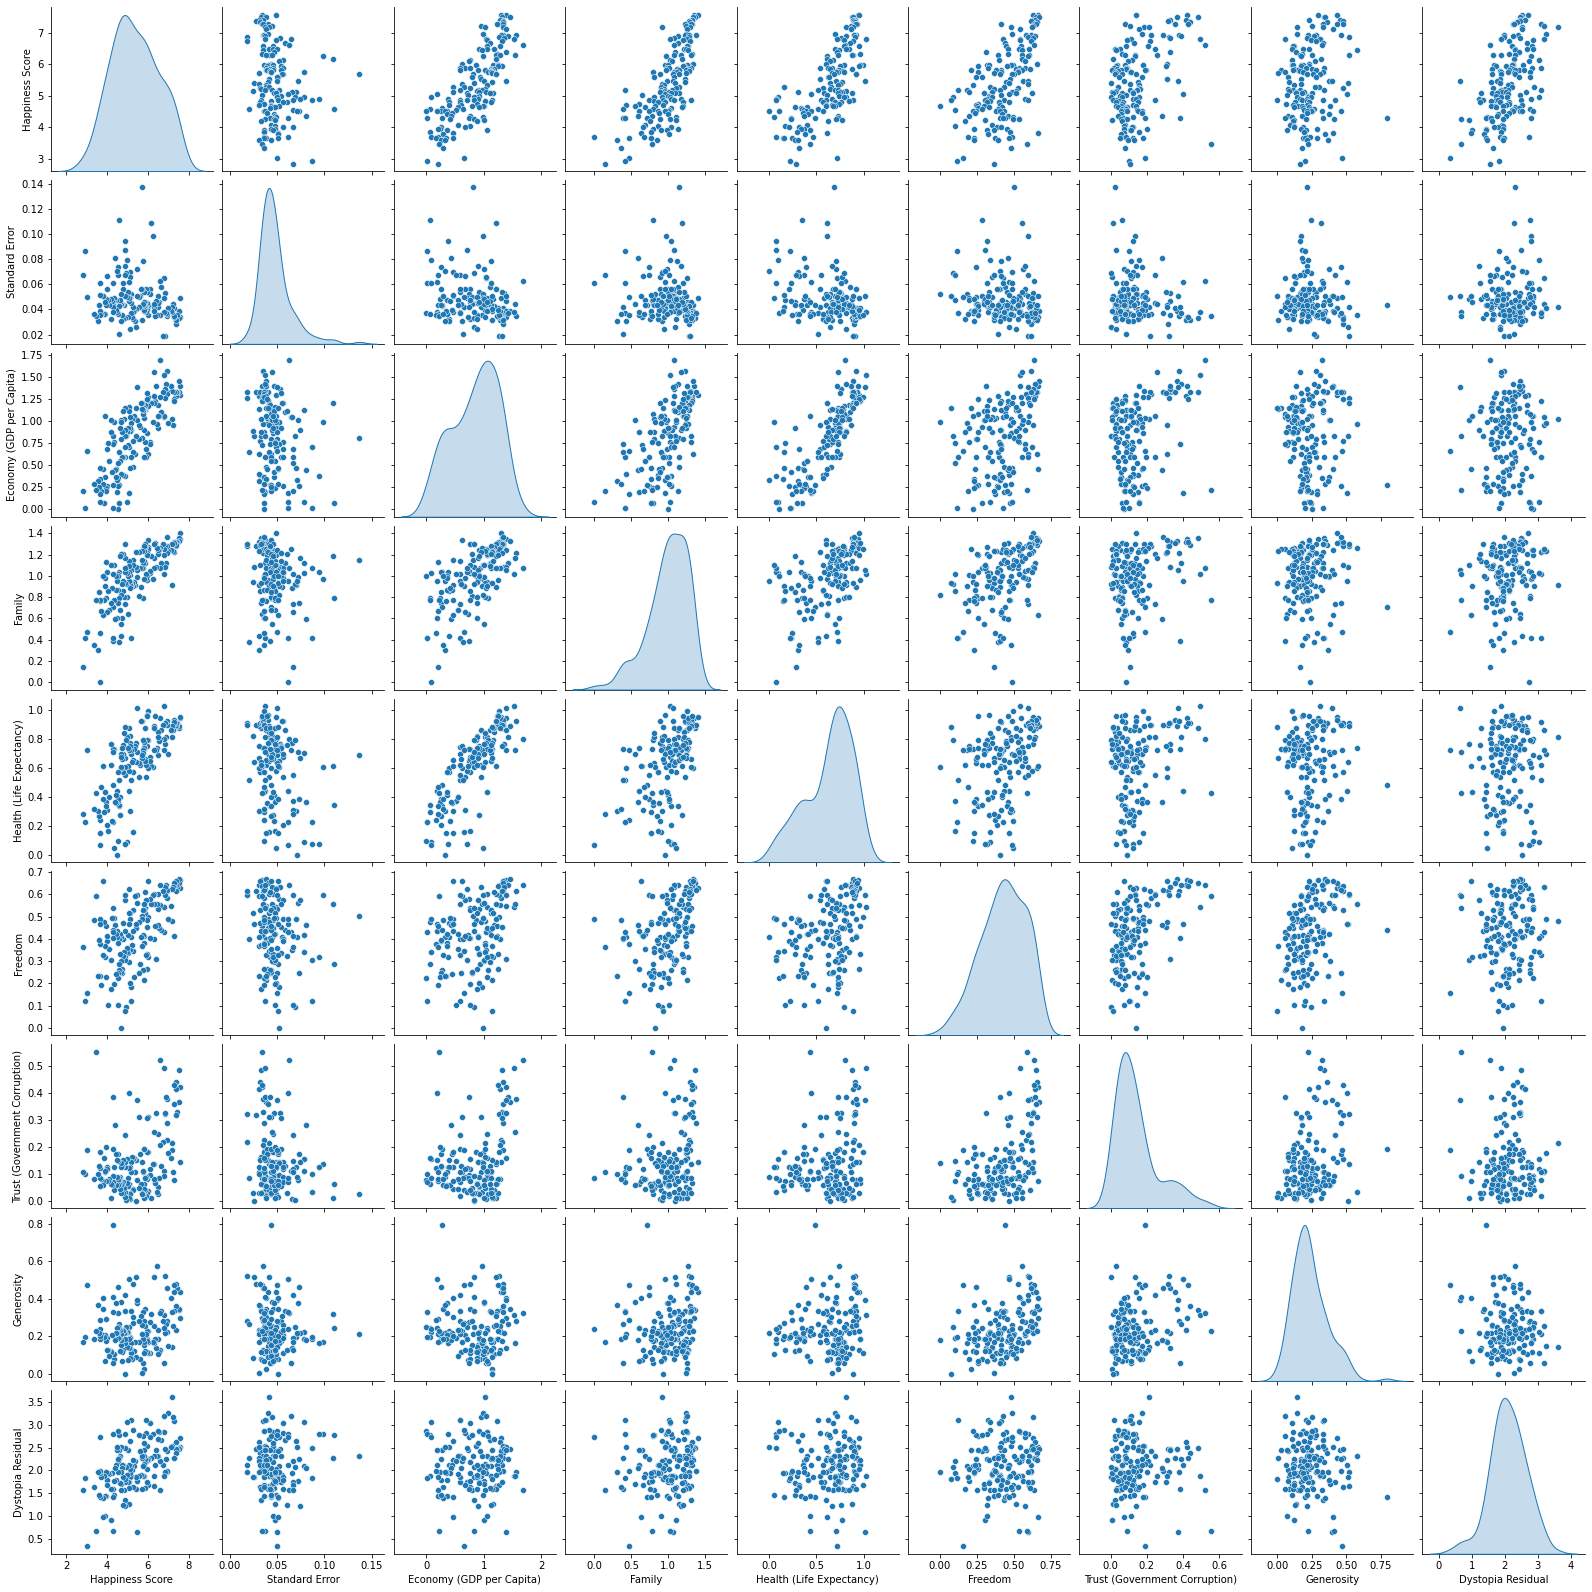

In [9]:
sns.pairplot(happiness, diag_kind='kde')

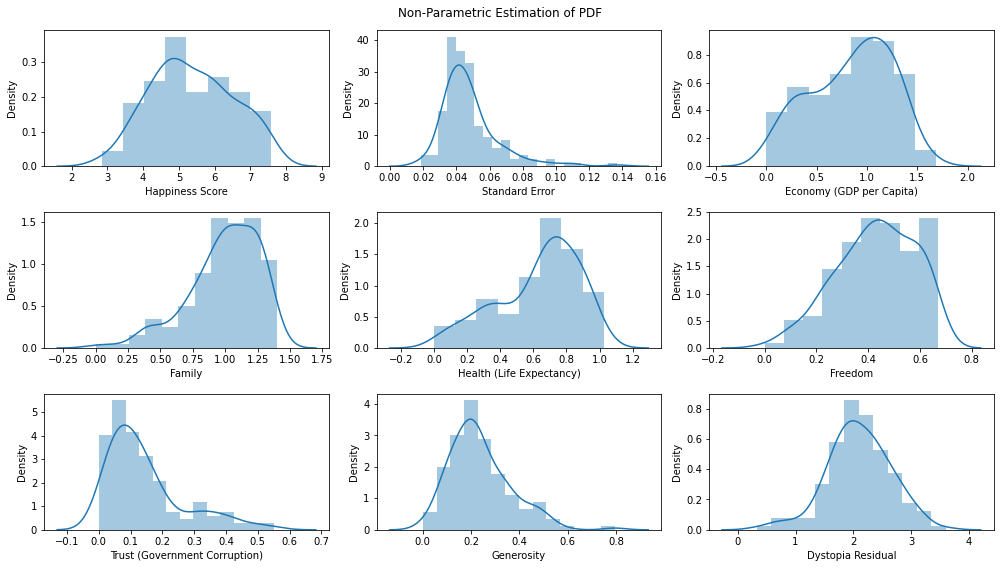

In [11]:
# initiate figure
fig, ax = plt.subplots(3, 3, figsize=(14,8))
fig.suptitle('Non-Parametric Estimation of PDF')

# columns to plot
columns = list(happiness.columns)

for ax, cols in zip(ax.flat, columns):
    sns.distplot(happiness[cols], ax=ax, kde=True)

plt.tight_layout()
plt.show()

Multivariate Mathematical Expectation & Variance
================================================
Take mean and variance from all continuous variables

In [12]:
happiness[columns].mean()

Happiness Score                  5.375734
Standard Error                   0.047885
Economy (GDP per Capita)         0.846137
Family                           0.991046
Health (Life Expectancy)         0.630259
Freedom                          0.428615
Trust (Government Corruption)    0.143422
Generosity                       0.237296
Dystopia Residual                2.098977
dtype: float64

In [13]:
happiness[columns].cov()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.311048,-0.003480,0.360476,0.230969,0.204881,0.098042,0.054316,0.026156,0.336225
Standard Error,-0.003480,0.000294,-0.001504,-0.000564,-0.001315,-0.000335,-0.000367,-0.000192,0.000797
Economy (GDP per Capita),0.360476,-0.001504,0.162506,0.070852,0.081323,0.022495,0.014898,-0.000534,0.008939
Family,0.230969,-0.000564,0.070852,0.074185,0.035741,0.018122,0.006722,0.003020,0.022332
Health (Life Expectancy),0.204881,-0.001315,0.081323,0.035741,0.061047,0.013422,0.007365,0.003391,0.002596
Freedom,0.098042,-0.000335,0.022495,0.018122,0.013422,0.022708,0.008927,0.007138,0.005237
Trust (Government Corruption),0.054316,-0.000367,0.014898,0.006722,0.007365,0.008927,0.014408,0.004199,-0.002200
Generosity,0.026156,-0.000192,-0.000534,0.003020,0.003391,0.007138,0.004199,0.016049,-0.007104
Dystopia Residual,0.336225,0.000797,0.008939,0.022332,0.002596,0.005237,-0.002200,-0.007104,0.306417


## Conditional Distribution Non-Parametric Estimation, Mathematical Expectation, & Variance

Generate discrete variable

In [19]:
def rank_cat(rank):
    if rank <= 50:
        return 'High'
    elif rank > 50 and rank < 100:
        return 'Medium'
    else:
        return 'Low'

df_happiness['Rank'] = df_happiness['Happiness Rank'].map(rank_cat)
df_happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Rank
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,High
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,High
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,High


Non-paramteric conditional distribution estimation

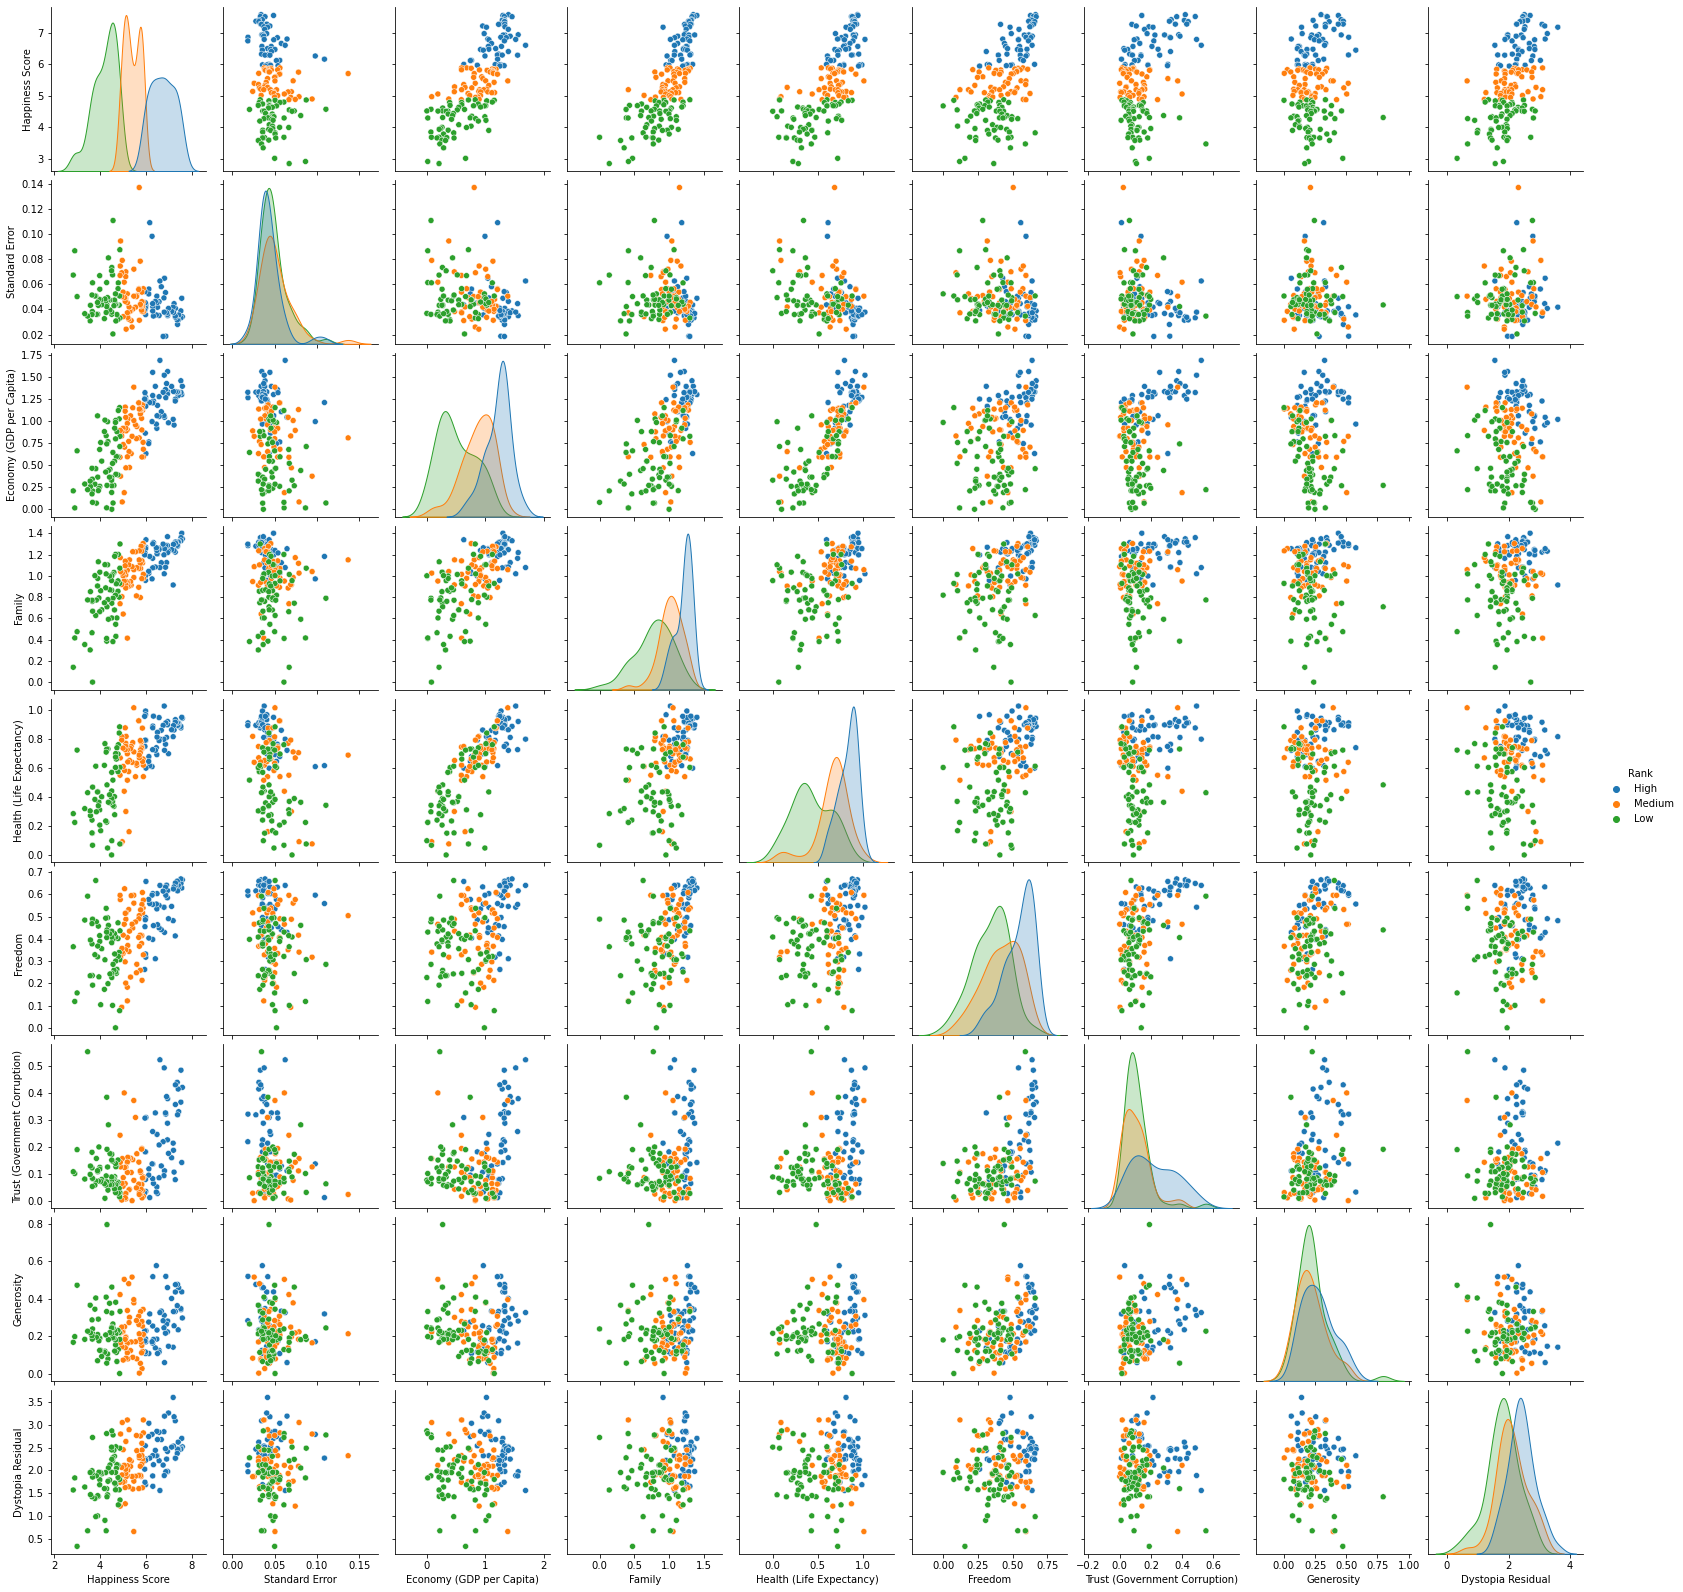

In [50]:
# columns to plot
columns = list(df_happiness.columns[3:])

sns.pairplot(df_happiness[columns], hue='Rank', diag_kind='kde')
plt.show()

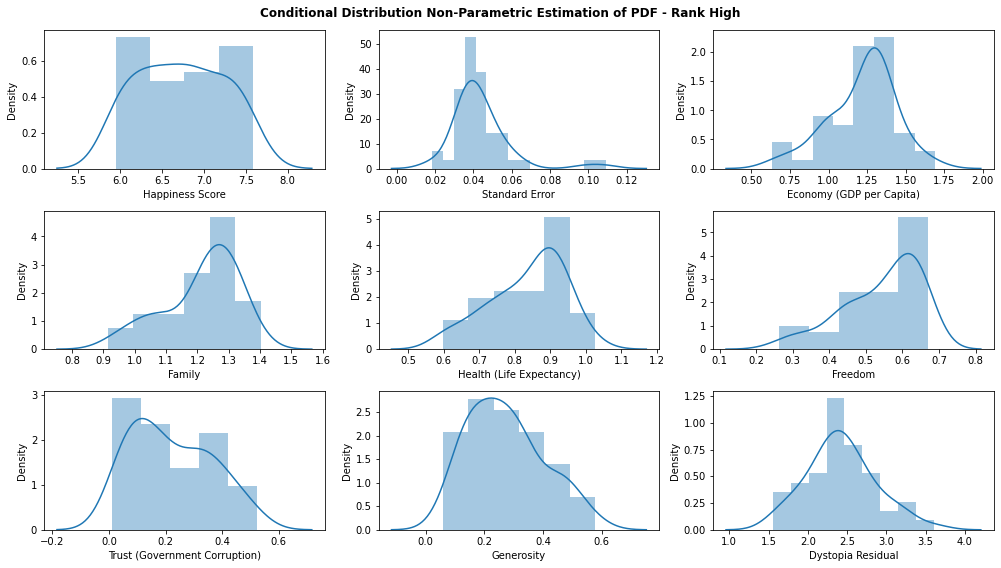

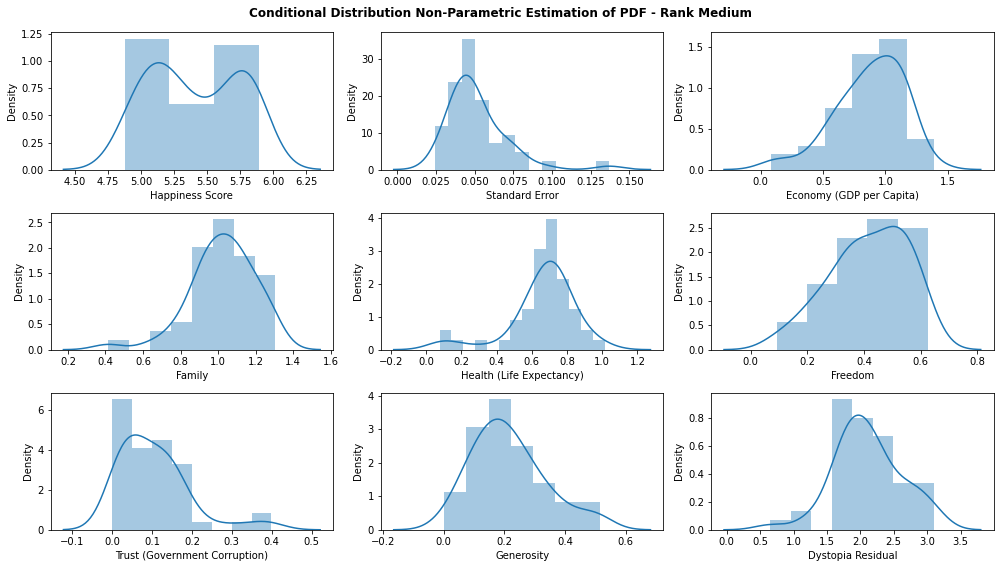

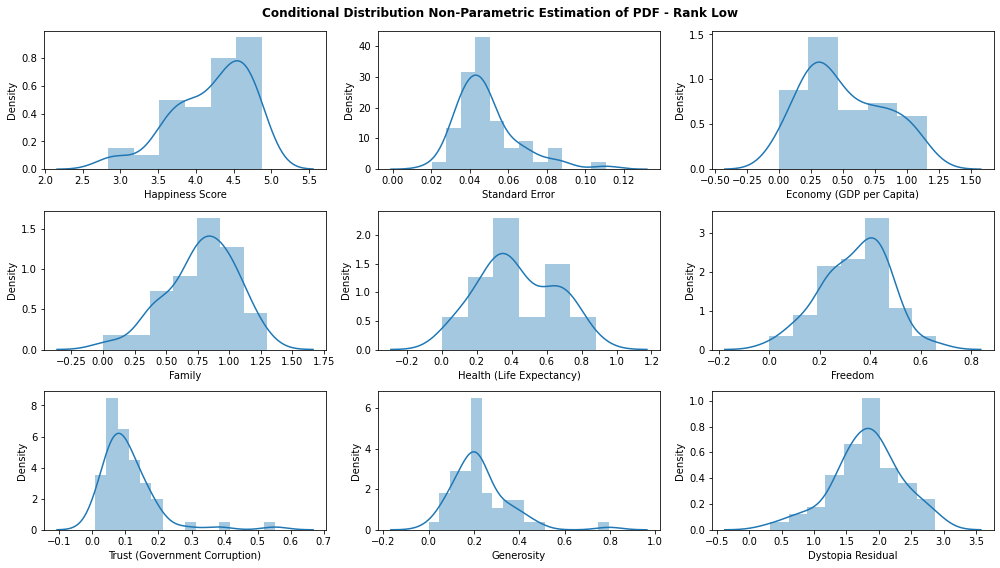

In [52]:
# initiate figure
fig, ax = plt.subplots(3, 3, figsize=(14,8))
fig.suptitle('Conditional Distribution Non-Parametric Estimation of PDF - Rank High', fontweight='bold')

# columns to plot
columns = list(happiness.columns)

for ax, cols in zip(ax.flat, columns):
    sns.distplot(df_happiness[df_happiness['Rank'] == 'High'][cols], ax=ax, kde=True)

plt.tight_layout()
plt.show()


# initiate figure
fig, ax = plt.subplots(3, 3, figsize=(14,8))
fig.suptitle('Conditional Distribution Non-Parametric Estimation of PDF - Rank Medium', fontweight='bold')

# columns to plot
columns = list(happiness.columns)

for ax, cols in zip(ax.flat, columns):
    sns.distplot(df_happiness[df_happiness['Rank'] == 'Medium'][cols], ax=ax, kde=True)

plt.tight_layout()
plt.show()


# initiate figure
fig, ax = plt.subplots(3, 3, figsize=(14,8))
fig.suptitle('Conditional Distribution Non-Parametric Estimation of PDF - Rank Low', fontweight='bold')

# columns to plot
columns = list(happiness.columns)

for ax, cols in zip(ax.flat, columns):
    sns.distplot(df_happiness[df_happiness['Rank'] == 'Low'][cols], ax=ax, kde=True)

plt.tight_layout()
plt.show()

Mathematical expectation and variance

In [53]:
conditional = df_happiness.Rank == 'High'
print('Mean')
print('------')
print(df_happiness[conditional][columns].mean(), end='\n\n')
print('Variance')
print('------')
print(df_happiness[conditional][columns].var(), end='\n\n')


conditional = df_happiness.Rank == 'Medium'
print('Mean')
print('------')
print(df_happiness[conditional][columns].mean(), end='\n\n')
print('Variance')
print('------')
print(df_happiness[conditional][columns].var(), end='\n\n')


conditional = df_happiness.Rank == 'Low'
print('Mean')
print('------')
print(df_happiness[conditional][columns].mean(), end='\n\n')
print('Variance')
print('------')
print(df_happiness[conditional][columns].var())

Mean
------
Happiness Score                  6.729040
Standard Error                   0.043584
Economy (GDP per Capita)         1.217752
Family                           1.212277
Health (Life Expectancy)         0.835402
Freedom                          0.543408
Trust (Government Corruption)    0.221732
Generosity                       0.273023
Dystopia Residual                2.425486
dtype: float64

Variance
------
Happiness Score                  0.261580
Standard Error                   0.000240
Economy (GDP per Capita)         0.046953
Family                           0.014151
Health (Life Expectancy)         0.011148
Freedom                          0.011149
Trust (Government Corruption)    0.020309
Generosity                       0.016404
Dystopia Residual                0.190628
dtype: float64

Mean
------
Happiness Score                  5.403163
Standard Error                   0.051189
Economy (GDP per Capita)         0.873576
Family                           1.021326
Heal

Pair Correlation Coefficient
===

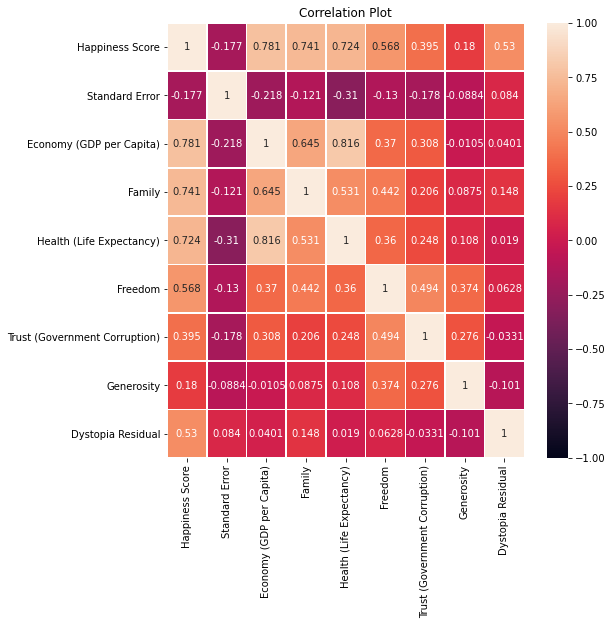

In [54]:
fig, ax = plt.subplots(figsize=(8,8))

corr = happiness[columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, ax=ax, vmax=1, vmin=-1, fmt='.3g', linewidths=.5)

plt.title('Correlation Plot')
plt.show()

In [55]:
from scipy import stats

table = np.zeros((len(columns), len(columns)), dtype='object')
p_table = np.zeros((len(columns), len(columns)), dtype='object')

for idi, i in enumerate(columns):
    for idj, j in enumerate(columns):

        x1, x2 = happiness[i], happiness[j]
        coeff, p = stats.pearsonr(x1, x2)
        coeff_z = np.arctanh(coeff)

        std = 1/np.sqrt(x1.size-3)
        alpha = 0.05
        z = stats.norm.ppf(1-alpha/2)
        low_z, high_z = coeff_z-z*std, coeff_z+z*std

        if idi == idj:
            table[idi][idj] = '(1.0, 1.0)'
            p_table[idi][idj] = p
        else:
            table[idi][idj] = f'({low_z:.3f}, {high_z:.3f})'        
            p_table[idi][idj] = p

table_df = pd.DataFrame(table, index=columns, columns=columns)
p_table_df = pd.DataFrame(p_table, index=columns, columns=columns)
table_df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,"(1.0, 1.0)","(-0.337, -0.022)","(0.890, 1.205)","(0.794, 1.109)","(0.759, 1.074)","(0.487, 0.802)","(0.261, 0.575)","(0.025, 0.340)","(0.433, 0.748)"
Standard Error,"(-0.337, -0.022)","(1.0, 1.0)","(-0.379, -0.064)","(-0.279, 0.036)","(-0.478, -0.163)","(-0.288, 0.027)","(-0.338, -0.023)","(-0.246, 0.069)","(-0.073, 0.242)"
Economy (GDP per Capita),"(0.890, 1.205)","(-0.379, -0.064)","(1.0, 1.0)","(0.610, 0.925)","(0.989, 1.304)","(0.231, 0.546)","(0.161, 0.476)","(-0.168, 0.147)","(-0.117, 0.198)"
Family,"(0.794, 1.109)","(-0.279, 0.036)","(0.610, 0.925)","(1.0, 1.0)","(0.434, 0.749)","(0.317, 0.632)","(0.051, 0.366)","(-0.070, 0.245)","(-0.008, 0.307)"
Health (Life Expectancy),"(0.759, 1.074)","(-0.478, -0.163)","(0.989, 1.304)","(0.434, 0.749)","(1.0, 1.0)","(0.220, 0.535)","(0.096, 0.411)","(-0.049, 0.266)","(-0.138, 0.176)"
Freedom,"(0.487, 0.802)","(-0.288, 0.027)","(0.231, 0.546)","(0.317, 0.632)","(0.220, 0.535)","(1.0, 1.0)","(0.383, 0.698)","(0.236, 0.550)","(-0.095, 0.220)"
Trust (Government Corruption),"(0.261, 0.575)","(-0.338, -0.023)","(0.161, 0.476)","(0.051, 0.366)","(0.096, 0.411)","(0.383, 0.698)","(1.0, 1.0)","(0.126, 0.441)","(-0.191, 0.124)"
Generosity,"(0.025, 0.340)","(-0.246, 0.069)","(-0.168, 0.147)","(-0.070, 0.245)","(-0.049, 0.266)","(0.236, 0.550)","(0.126, 0.441)","(1.0, 1.0)","(-0.259, 0.056)"
Dystopia Residual,"(0.433, 0.748)","(-0.073, 0.242)","(-0.117, 0.198)","(-0.008, 0.307)","(-0.138, 0.176)","(-0.095, 0.220)","(-0.191, 0.124)","(-0.259, 0.056)","(1.0, 1.0)"


In [56]:
p_table_df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,0.0,0.025879,0.0,0.0,0.0,0.0,0.0,0.023379,0.0
Standard Error,0.025879,0.0,0.006012,0.130786,0.000073,0.10413,0.02498,0.269161,0.294134
Economy (GDP per Capita),0.0,0.006012,0.0,0.0,0.0,0.000002,0.000083,0.896165,0.617263
Family,0.0,0.130786,0.0,0.0,0.0,0.0,0.009552,0.274223,0.063272
Health (Life Expectancy),0.0,0.000073,0.0,0.0,0.0,0.000003,0.001654,0.17544,0.812895
Freedom,0.0,0.10413,0.000002,0.0,0.000003,0.0,0.0,0.000001,0.433226
Trust (Government Corruption),0.0,0.02498,0.000083,0.009552,0.001654,0.0,0.0,0.000445,0.67966
Generosity,0.023379,0.269161,0.896165,0.274223,0.17544,0.000001,0.000445,0.0,0.205339
Dystopia Residual,0.0,0.294134,0.617263,0.063272,0.812895,0.433226,0.67966,0.205339,0.0


Regression Data Prep
===

In [420]:
happiness.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [421]:
# predictors - select variables with low correlation to economy variable
X = happiness.drop(['Economy (GDP per Capita)'], axis=1)

# target
y = happiness[['Economy (GDP per Capita)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

# predict
y_pred = lr.predict(X_test)
params = np.append(lr.intercept_, lr.coef_)

print(f'Params: {params}')
print(f'coef: {lr.coef_}')
print(f'intercept: {lr.intercept_}')

Params: [-5.48821986e-05  9.99871802e-01  8.46414655e-04 -9.99838598e-01
 -9.99760311e-01 -9.99715277e-01 -9.99835457e-01 -9.99775266e-01
 -9.99901212e-01]
coef: [[ 9.99871802e-01  8.46414655e-04 -9.99838598e-01 -9.99760311e-01
  -9.99715277e-01 -9.99835457e-01 -9.99775266e-01 -9.99901212e-01]]
intercept: [-5.48821986e-05]


In [422]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE = {mae}')
print(f'MSE = {mse}')
print(f'RMSE = {rmse}')
print(f'MAPE = {mape}')
print(f'R2 = {r2}')

MAE = 0.0002311656584623553
MSE = 7.481616203019153e-08
RMSE = 0.0002735254321451509
MAPE = 0.0014448013991987245
R2 = 0.9999995922698525


Multicollinearity Analysis
---

In [423]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

In [436]:
dropcol = ['Happiness Score', 'Family', 'Freedom', 'Economy (GDP per Capita)']
X = happiness.drop(dropcol, axis=1)
calc_vif(X)

,variables,VIF
0,Standard Error,6.672479
1,Health (Life Expectancy),6.634891
2,Trust (Government Corruption),2.787018
3,Generosity,4.465145
4,Dystopia Residual,10.429306


In [437]:
X = happiness.drop(dropcol, axis=1)
# X = happiness[['Happiness Score', 'Standard Error', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Quality Analysis
===

metrics                               score
------------------------------  -----------
Mean Absolute Error             0.16703
Mean Squared Error              0.0494195
Root Mean Squared Error         0.222305
Mean Absolute Percentage Error  3.36257e+12
R-squared                       0.693955

Mean distribution: -0.0149787535013982
Kolmogorov-Smirnov p-value: 0.0


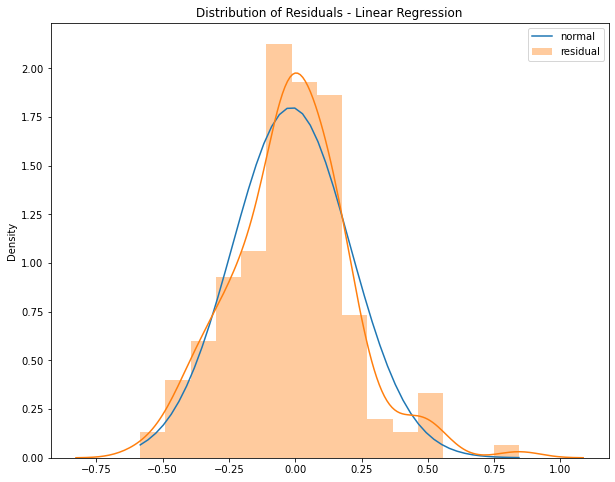

In [441]:
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred_all = lr.predict(X)

vif_mae = mean_absolute_error(y, y_pred_all)
vif_mse = mean_squared_error(y, y_pred_all)
vif_rmse = mean_squared_error(y, y_pred_all, squared=False)
vif_mape = mean_absolute_percentage_error(y, y_pred_all)
vif_r2 = r2_score(y, y_pred_all)

headers = ['metrics', 'score']
index = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Percentage Error', 'R-squared']
table = [
    ['Mean Absolute Error', vif_mae],
    ['Mean Squared Error', vif_mse],
    ['Root Mean Squared Error', vif_rmse],
    ['Mean Absolute Percentage Error', vif_mape],
    ['R-squared', vif_r2]
]

# print('Table Comparison')
print(tabulate(table, headers=headers), end='\n\n')

# distribution of residuals
y1 = np.array(y)
y2 = np.array(y_pred_all)
y_diff = y1 - y2
print(f'Mean distribution: {np.mean(y_diff)}')

x = np.linspace(np.min(y_diff), np.max(y_diff))
nparam = scipy.stats.norm.fit(y_diff)
stat, p = scipy.stats.kstest(y_diff, 'norm', nparam, N=100)
print(f'Kolmogorov-Smirnov p-value: {p}')

plt.figure(figsize=(10,8))
plt.plot(x, scipy.stats.norm.pdf(x, *nparam), label='normal')
sns.distplot(y_diff, kde=True, label='residual')
plt.title('Distribution of Residuals - Linear Regression')
plt.legend()
plt.show()

metrics                               score
------------------------------  -----------
Mean Absolute Error             0.166962
Mean Squared Error              0.0493917
Root Mean Squared Error         0.222242
Mean Absolute Percentage Error  3.40863e+12
R-squared                       0.694127

Mean distribution: -0.014916808530886531
Kolmogorov-Smirnov p-value: 0.0


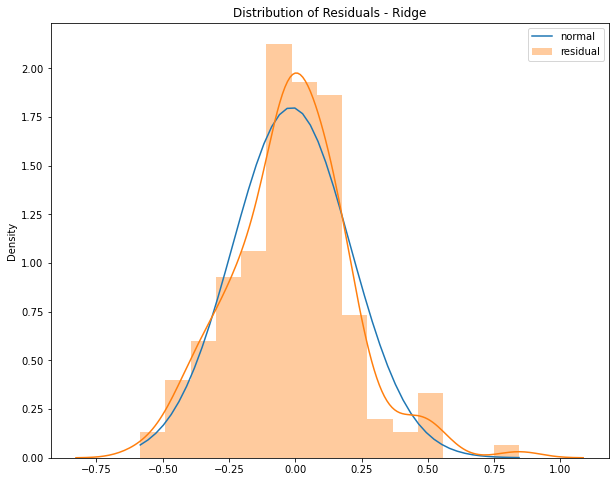

In [445]:
ridge = Ridge(alpha=0.0015)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
ridge_pred_all = ridge.predict(X)

ridge_vif_mae = mean_absolute_error(y, ridge_pred_all)
ridge_vif_mse = mean_squared_error(y, ridge_pred_all)
ridge_vif_rmse = mean_squared_error(y, ridge_pred_all, squared=False)
ridge_vif_mape = mean_absolute_percentage_error(y, ridge_pred_all)
ridge_vif_r2 = r2_score(y, ridge_pred_all)

headers = ['metrics', 'score']
index = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Percentage Error', 'R-squared']
table = [
    ['Mean Absolute Error', ridge_vif_mae],
    ['Mean Squared Error', ridge_vif_mse],
    ['Root Mean Squared Error', ridge_vif_rmse],
    ['Mean Absolute Percentage Error', ridge_vif_mape],
    ['R-squared', ridge_vif_r2]
]

# print('Table Comparison')
print(tabulate(table, headers=headers), end='\n\n')

# distribution of residuals
ridge_y1 = np.array(y)
ridge_y2 = np.array(ridge_pred_all)
ridge_y_diff = ridge_y1 - ridge_y2
print(f'Mean distribution: {np.mean(ridge_y_diff)}')

ridge_x = np.linspace(np.min(ridge_y_diff), np.max(ridge_y_diff))
ridge_nparam = scipy.stats.norm.fit(ridge_y_diff)
ridge_stat, ridge_p = scipy.stats.kstest(ridge_y_diff, 'norm', nparam, N=100)
print(f'Kolmogorov-Smirnov p-value: {ridge_p}')

plt.figure(figsize=(10,8))
plt.plot(x, scipy.stats.norm.pdf(ridge_x, *ridge_nparam), label='normal')
sns.distplot(ridge_y_diff, kde=True, label='residual')
plt.title('Distribution of Residuals - Ridge')
plt.legend()
plt.show()

metrics                               score
------------------------------  -----------
Mean Absolute Error             0.168067
Mean Squared Error              0.0503773
Root Mean Squared Error         0.224449
Mean Absolute Percentage Error  4.85893e+12
R-squared                       0.688023

Mean distribution: -0.013494091008729284
Kolmogorov-Smirnov p-value: 9.775487744040173e-195


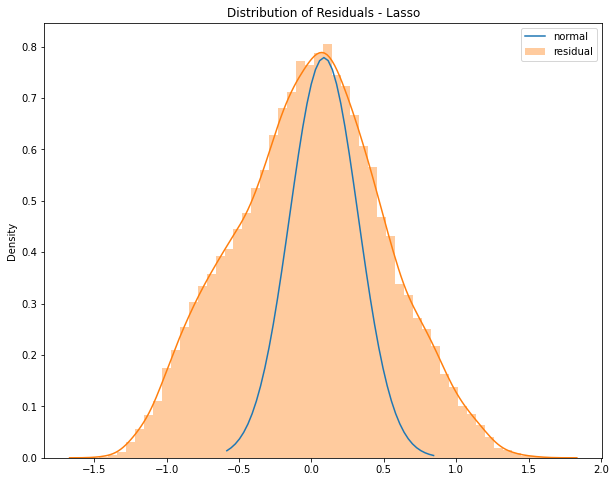

In [444]:
lasso = Lasso(alpha=0.0015)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)
lasso_pred_all = lasso.predict(X)

lasso_vif_mae = mean_absolute_error(y, lasso_pred_all)
lasso_vif_mse = mean_squared_error(y, lasso_pred_all)
lasso_vif_rmse = mean_squared_error(y, lasso_pred_all, squared=False)
lasso_vif_mape = mean_absolute_percentage_error(y, lasso_pred_all)
lasso_vif_r2 = r2_score(y, lasso_pred_all)

headers = ['metrics', 'score']
table = [
    ['Mean Absolute Error', lasso_vif_mae],
    ['Mean Squared Error', lasso_vif_mse],
    ['Root Mean Squared Error', lasso_vif_rmse],
    ['Mean Absolute Percentage Error', lasso_vif_mape],
    ['R-squared', lasso_vif_r2]
]

# print('Table Comparison')
print(tabulate(table, headers=headers), end='\n\n')

# distribution of residuals
lasso_y1 = np.array(y)
lasso_y2 = np.array(lasso_pred_all)
lasso_y_diff = lasso_y1 - lasso_y2
print(f'Mean distribution: {np.mean(lasso_y_diff)}')

lasso_x = np.linspace(np.min(lasso_y_diff), np.max(lasso_y_diff))
lasso_nparam = scipy.stats.norm.fit(lasso_y_diff)
lasso_stat, lasso_p = scipy.stats.kstest(lasso_y_diff, 'norm', nparam, N=100)
print(f'Kolmogorov-Smirnov p-value: {lasso_p}')

plt.figure(figsize=(10,8))
plt.plot(x, scipy.stats.norm.pdf(lasso_x, *lasso_nparam), label='normal')
sns.distplot(lasso_y_diff, kde=True, label='residual')
plt.title('Distribution of Residuals - Lasso')
plt.legend()
plt.show()

### Interesting Discovery

In [448]:
X = happiness[['Happiness Score', 'Standard Error', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
calc_vif(X)

,variables,VIF
0,Happiness Score,49.538486
1,Standard Error,6.826686
2,Freedom,17.660327
3,Trust (Government Corruption),3.505145
4,Generosity,5.167949
5,Dystopia Residual,26.206877


metrics                               score
------------------------------  -----------
Mean Absolute Error             0.0924379
Mean Squared Error              0.0140417
Root Mean Squared Error         0.118497
Mean Absolute Percentage Error  6.20616e+12
R-squared                       0.913043

Mean distribution: -0.010978752631560099
Kolmogorov-Smirnov p-value: 0.0


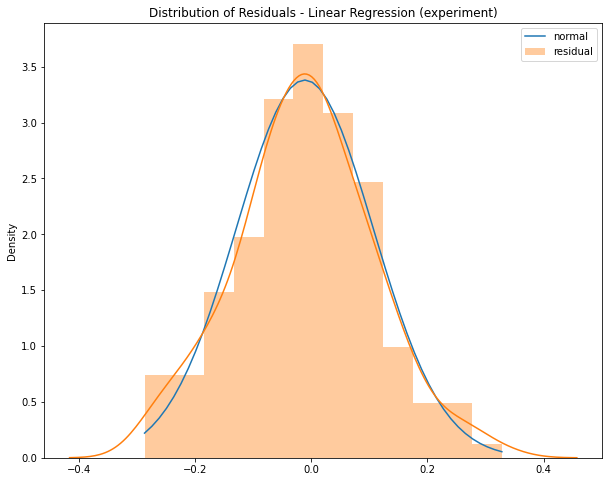

In [451]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred_all = lr.predict(X)

vif_mae = mean_absolute_error(y, y_pred_all)
vif_mse = mean_squared_error(y, y_pred_all)
vif_rmse = mean_squared_error(y, y_pred_all, squared=False)
vif_mape = mean_absolute_percentage_error(y, y_pred_all)
vif_r2 = r2_score(y, y_pred_all)

headers = ['metrics', 'score']
index = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Percentage Error', 'R-squared']
table = [
    ['Mean Absolute Error', vif_mae],
    ['Mean Squared Error', vif_mse],
    ['Root Mean Squared Error', vif_rmse],
    ['Mean Absolute Percentage Error', vif_mape],
    ['R-squared', vif_r2]
]

# print('Table Comparison')
print(tabulate(table, headers=headers), end='\n\n')

# distribution of residuals
y1 = np.array(y)
y2 = np.array(y_pred_all)
y_diff = y1 - y2
print(f'Mean distribution: {np.mean(y_diff)}')

x = np.linspace(np.min(y_diff), np.max(y_diff))
nparam = scipy.stats.norm.fit(y_diff)
stat, p = scipy.stats.kstest(y_diff, 'norm', nparam, N=100)
print(f'Kolmogorov-Smirnov p-value: {p}')

plt.figure(figsize=(10,8))
plt.plot(x, scipy.stats.norm.pdf(x, *nparam), label='normal')
sns.distplot(y_diff, kde=True, label='residual')
plt.title('Distribution of Residuals - Linear Regression (experiment)')
plt.legend()
plt.show()